### Dish is Sean Connery schpeaking. You there. Come closher...

<img src="https://media1.britannica.com/eb-media/50/66150-004-A27B7E90.jpg" alt="Title" style="width: 200px; height: 200px"/>

### I want to tell you a tale of a man. A hero. Dish is the story... of James Bond (aka Sean Connery).

<img src="https://s-media-cache-ak0.pinimg.com/originals/6f/07/54/6f075401364552cfcb3caf46f9747614.jpg" alt="Title" style="width: 150px; height: 200px"/>

In [47]:
### Print out hish movies below sonny boy. I don't have all day
import urllib2
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np

soup = BeautifulSoup(urllib2.urlopen('https://en.wikipedia.org/wiki/List_of_James_Bond_films').read())


In [2]:
tables=soup.find_all('table', class_="wikitable")

raw = {
    "title":[]
}
for idx, table in enumerate(tables):
    if idx == 0:
        for idx2, rows in enumerate(table.find_all('tr')):
            if idx2 > 1:
                for idx3, columns in enumerate(rows.find_all('th')):
                    movies = columns.text.split('!')
                    raw['title'] += [movies[len(movies) - 1].replace('[N]', '')]


moviesdf = pd.DataFrame(raw)
moviesdf

,title
0,Dr. No
1,From Russia with Love
2,Goldfinger
3,Thunderball
4,Casino Royale
5,You Only Live Twice
6,On Her Majesty's Secret Service
7,Diamonds Are Forever
8,Live and Let Die
9,The Man with the Golden Gun


### That's right boy. Pull the movie's informashon from the webshite below. Just the plot, imdb shcore, poshter, and genre should do.

In [21]:
import json

bond_movie = 'The+Spy+Who+Loved+Me'
soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+bond_movie).read())
parse_json = json.loads(soup.text)

print 'Plot:', parse_json['Plot']
print 'IMDB Rating:', parse_json['imdbRating']
print 'Poster URL:', parse_json['Poster']
print 'Genre: ', parse_json['Genre']

Image(url = parse_json['Poster'], width=250, height=250)

Plot: James Bond investigates the hijacking of British and Russian submarines carrying nuclear warheads with the help of a KGB agent whose lover he killed.
IMDB Rating: 7.1
Poster URL: https://images-na.ssl-images-amazon.com/images/M/MV5BMjI1MTA5NDE1NF5BMl5BanBnXkFtZTcwMDIzMzY0NA@@._V1_SX300.jpg
Genre:  Action, Adventure, Sci-Fi


### There were shome low times in the life of James Bond. 
#### *cough* 
#### Go on boy. Show the lowesht rated show's poster.

In [57]:
from IPython.display import Image
from IPython.core.display import HTML 

#cleaning up the data inot a dataframe
raw = []
for name in moviesdf["title"]:
    soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+name.replace(' ', '+')).read())
    parse_json = json.loads(soup.text)
    raw += [parse_json]

dfw = pd.DataFrame(raw)   

In [5]:
image = dfw[dfw['imdbRating'] == min(dfw['imdbRating'])]['Poster'].values[0]

Image(url = image, width=250, height=250)

### But there were alsho high times! And glorious they were! Even though shome of them had Denise Richards. 
#### Show the highest rated show's poster. We don't have all day.

In [23]:
image = dfw[dfw['imdbRating'] == max(dfw['imdbRating'])]['Poster'].values[0]
Image(url = image, width=250, height=250)

### Plot his ratings over time. Has he continued to improve? Is he more badass than ever before?
#### Make a line plot with James Bonds' imdb ratings

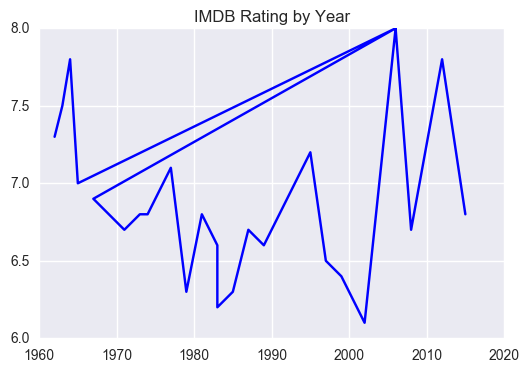

In [56]:
% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

x = [float(i) for i in dfw.Year]
y = [float(i) for i in dfw.imdbRating]


plt.plot(x,y , color="b")
plt.title('IMDB Rating by Year')

# I cannot figure out why this plot is shooting off to the right. 
# my intuition would tell me there is 2 years for the rating at 8.0. but this doesnt appear to be the case.

#### Looks like he'sh making a comeback! And what a comeback it will be! For our last shcell we need to show the world that James Bond movies transhend all boundaries. Let'sh print a count of the genres for all of Mr. Bonds' movies.

In [58]:
(dfw['Genre']).value_counts()

Action, Adventure, Thriller    23
Action, Adventure, Sci-Fi       2
Action, Adventure               1
Name: Genre, dtype: int64

<img src="https://media1.britannica.com/eb-media/50/66150-004-A27B7E90.jpg" alt="Title" style="width: 200px; height: 200px"/>

## And that's my shtory shonny boy. Like it or not, James Bond was a hell of a guy. This is Sean Connery Shigning out.

In [ ]:
#Later James...